In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
path='https://raw.githubusercontent.com/codebasics/py/master/ML/14_naive_bayes/titanic.csv'



In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.3)

In [10]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [11]:
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [12]:
model.score(X_test,y_test)

0.7870370370370371

In [13]:

X_test[0]

array([ 0.,  0.,  0.,  0.,  9., 16.,  4.,  0.,  0.,  0.,  0.,  5., 15.,
       16.,  2.,  0.,  0.,  3., 12., 16., 16., 14.,  0.,  0.,  0., 10.,
       16., 15., 16., 15.,  0.,  0.,  0.,  1.,  4.,  0., 16., 13.,  0.,
        0.,  0.,  0.,  0.,  0., 15., 13.,  0.,  0.,  0.,  0.,  0.,  0.,
       12., 16., 12.,  0.,  0.,  0.,  0.,  0., 12., 16.,  6.,  0.])

In [14]:
X_test[0].reshape(8,8)

array([[ 0.,  0.,  0.,  0.,  9., 16.,  4.,  0.],
       [ 0.,  0.,  0.,  5., 15., 16.,  2.,  0.],
       [ 0.,  3., 12., 16., 16., 14.,  0.,  0.],
       [ 0., 10., 16., 15., 16., 15.,  0.,  0.],
       [ 0.,  1.,  4.,  0., 16., 13.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 15., 13.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 12., 16., 12.,  0.],
       [ 0.,  0.,  0.,  0., 12., 16.,  6.,  0.]])

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:

X_test[3]

array([ 0.,  0.,  1.,  9., 15., 11.,  3.,  0.,  0.,  0., 12.,  9.,  1.,
       11.,  6.,  0.,  0.,  0., 13.,  7.,  6., 16.,  8.,  0.,  0.,  0.,
        4., 10., 12., 15.,  4.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  6.,
        0.,  0.,  8.,  7.,  0.,  0., 15.,  5.,  0.,  0.,  1., 12., 10.,
        4., 16.,  3.,  0.,  0.,  0.,  0., 13., 16.,  8.,  0.,  0.])

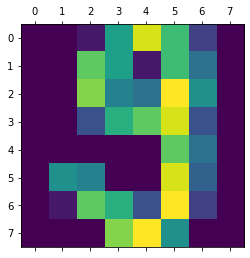

In [17]:

plt.matshow(X_test[3].reshape(8,8))

In [18]:
model.predict([X_test[3]])

array([9])

In [21]:
import pandas as pd
df=pd.read_csv(path)
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [22]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
df.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [23]:
inputs = df.drop('Survived',axis='columns')
target = df.Survived

In [24]:
##inputs.Sex = inputs.Sex.map({'male': 1, 'female': 2})

In [25]:
dummies = pd.get_dummies(inputs.Sex)
dummies.head(3)

,female,male
0,0,1
1,1,0
2,1,0


In [26]:
inputs = pd.concat([inputs,dummies],axis='columns')
inputs.head(3)

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0


In [27]:
inputs.drop('Sex',axis='columns',inplace=True)
inputs.head(3)

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0


In [28]:
inputs.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [29]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())
inputs.head()

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2)


In [31]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [32]:
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [33]:
model.score(X_test,y_test)

0.7988826815642458

In [34]:
X_test[0:10]

,Pclass,Age,Fare,female,male
109,3,29.699118,24.1500,1,0
451,3,29.699118,19.9667,0,1
297,1,2.000000,151.5500,1,0
89,3,24.000000,8.0500,0,1
753,3,23.000000,7.8958,0,1
102,1,21.000000,77.2875,0,1
818,3,43.000000,6.4500,0,1
361,2,29.000000,27.7208,0,1
3,1,35.000000,53.1000,1,0
254,3,41.000000,20.2125,1,0


In [35]:
y_test[0:10]

109    1
451    0
297    0
89     0
753    0
102    0
818    0
361    0
3      1
254    0
Name: Survived, dtype: int64

In [36]:
model.predict(X_test[0:10])

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1], dtype=int64)